#### Price Action Indicators

In [ ]:
import os
import sqlite3
import pandas as pd
import numpy as np
import matplotlib as plot
import matplotlib_inline
%matplotlib inline

#### Load our Data  

In [ ]:
# Load from price table
# Convert string columns to float values
# Replace "-" prices with Close values
# Remove All Volumes that have zero trading

In [3]:
# Heavy function to retreive all prices from database (more than 5 million rows, takes many seconds to execute)
def get_all_prices():
    conn = sqlite3.connect("TSX_Quality.sqlite")
    sql = f"SELECT * FROM prices_daily ORDER BY UPPER(Ticker) ASC, Date DESC"
    prices = pd.read_sql_query(sql, conn, index_col="Date")
    prices.index = pd.to_datetime(prices.index)
    
    # Clean up CSV data to make sure we have only floats and no "-" values
    prices.replace("-", np.NaN, inplace=True)
    prices["Open"] = prices["Open"].astype(float)
    prices["High"] = prices["High"].astype(float)
    prices["Low"]  = prices["Low"].astype(float)
    prices["Close"]= prices["Close"].astype(float)
    
    #prices = pd.read_sql_query(sql, conn, index_col="ticker")
    #prices.drop("index", axis=1, inplace=True)
    
    return prices

prices = get_all_prices()



In [ ]:
prices.dtypes
prices


In [5]:
prices_per_ticker = prices.groupby(["Ticker"])
prices_per_ticker.get_group("SHOP")
#prices_per_ticker.get_group("SHOP")["Close"].rolling(window=200).mean()


,Ticker,Open,High,Low,Close,Volume
Date,,,,,,
2022-01-07,SHOP,1487.430054,1498.150024,1424.949951,1432.339966,155413.0
2022-01-06,SHOP,1498.820000,1524.700000,1456.710000,1487.470000,212593.0
2022-01-05,SHOP,1541.200000,1555.890000,1498.010000,1513.450000,253064.0
2022-01-04,SHOP,1742.370000,1742.370000,1540.000000,1552.230000,390884.0
2021-12-31,SHOP,1781.390000,1781.400000,1740.770000,1741.690000,98397.0
...,...,...,...,...,...,...
2014-09-01,SHOP,NaN,NaN,NaN,0.040000,0.0
2014-08-29,SHOP,NaN,NaN,NaN,0.040000,0.0
2014-08-28,SHOP,NaN,NaN,NaN,0.040000,0.0


In [6]:
# prices_per_ticker.get_group("SHOP").loc["2021-03" : "2021-05"]   #Deprecated method sort dataframe before using slicing on index
prices_per_ticker.get_group("SHOP").sort_index().loc["2016-03" : "2016-05"]

,Ticker,Open,High,Low,Close,Volume
Date,,,,,,
2016-03-01,SHOP,30.12,30.62,29.90,30.41,44712.0
2016-03-02,SHOP,30.47,32.74,30.40,32.53,75221.0
2016-03-03,SHOP,32.56,34.41,31.75,32.61,83375.0
2016-03-04,SHOP,32.83,33.93,32.82,33.51,40003.0
2016-03-07,SHOP,33.95,34.39,33.03,34.24,69334.0
...,...,...,...,...,...,...
2016-05-25,SHOP,35.82,36.90,35.55,36.71,70863.0
2016-05-26,SHOP,36.93,36.93,35.83,36.01,57421.0
2016-05-27,SHOP,36.35,37.37,36.17,37.27,44028.0


In [7]:
# prices_per_ticker.get_group("SHOP").sort_index().loc["2015"]["High"].max()
prices_per_ticker.get_group("SHOP").sort_index().loc["2014"]["Low"].min()
# 2228.73  : MAX All years      MIN   25.85
# 1742.37  : MAX 2022           MIN 1424.95
# 2228.73  : MAX 2021           MIN 1248.55
# 1658.79  : MAX 2020           MIN  435.03
#  544.00  : MAX 2019           MIN  174.59
#  232.65  : MAX 2018           MIN  126.65
#  151.88  : MAX 2017           MIN   56.60
#   60.93  : MAX 2016           MIN   25.85
#   53.50  : MAX 2015           MIN   30.00

nan

<AxesSubplot:xlabel='Date'>

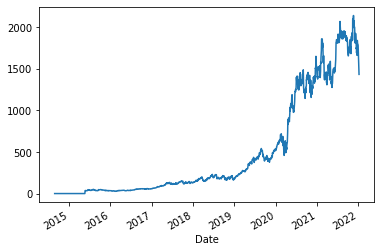

In [15]:
#shop = prices_per_ticker.get_group("SHOP").sort_index().loc["2021"]
shop = prices_per_ticker.get_group("SHOP").sort_index()
shop["Close"].plot()
